# IRIS FLOWER CLASSIFICATION

## Necessary Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Import Data

In [2]:
df = pd.read_csv("/content/IRIS.csv")

In [3]:
# Overview of Data

df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.shape

(147, 5)

Data Summary:
- Sepal length (in centimeters)
- Sepal width (in centimeters)
- Petal length (in centimeters)
- Petal width (in centimeters)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


We have 4 features with numerical values, label has three classes.

### Checking for null and duplicate values

In [7]:
# Null
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
# Duplicate
df.duplicated().sum()

3

In [12]:
df.drop_duplicates(inplace=True)

We found no null values but 3 duplicates. We have dropped the duplicated values from the dataset.

## EDA

## Statistcs of Numerical Features

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Distribution of features and label

<Axes: xlabel='petal_width', ylabel='Count'>

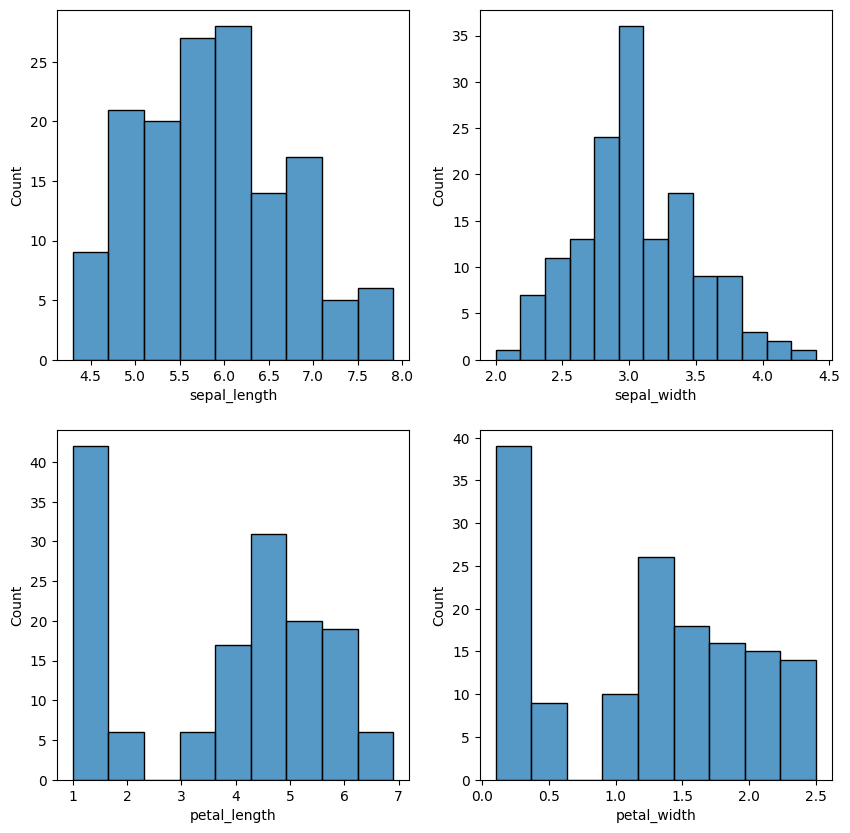

In [23]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
sns.histplot(x="sepal_length",data=df, ax=ax[0])
sns.histplot(x="sepal_width",data=df, ax=ax[1])
sns.histplot(x="petal_length",data=df, ax=ax[2])
sns.histplot(x="petal_width",data=df, ax=ax[3])

## Distribution of Label

In [25]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

<Axes: xlabel='species', ylabel='count'>

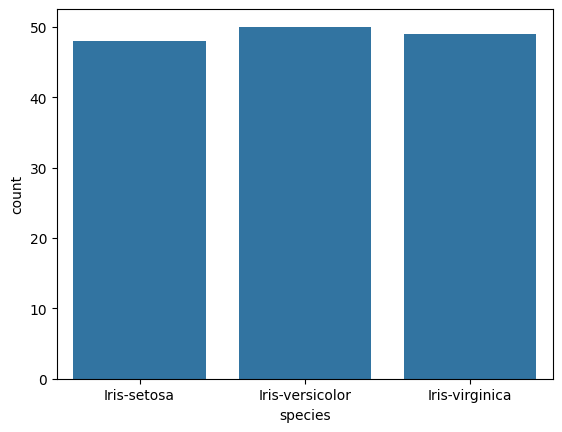

In [30]:
sns.countplot(x="species", data=df)

## Outlier Detection

<Axes: ylabel='petal_width'>

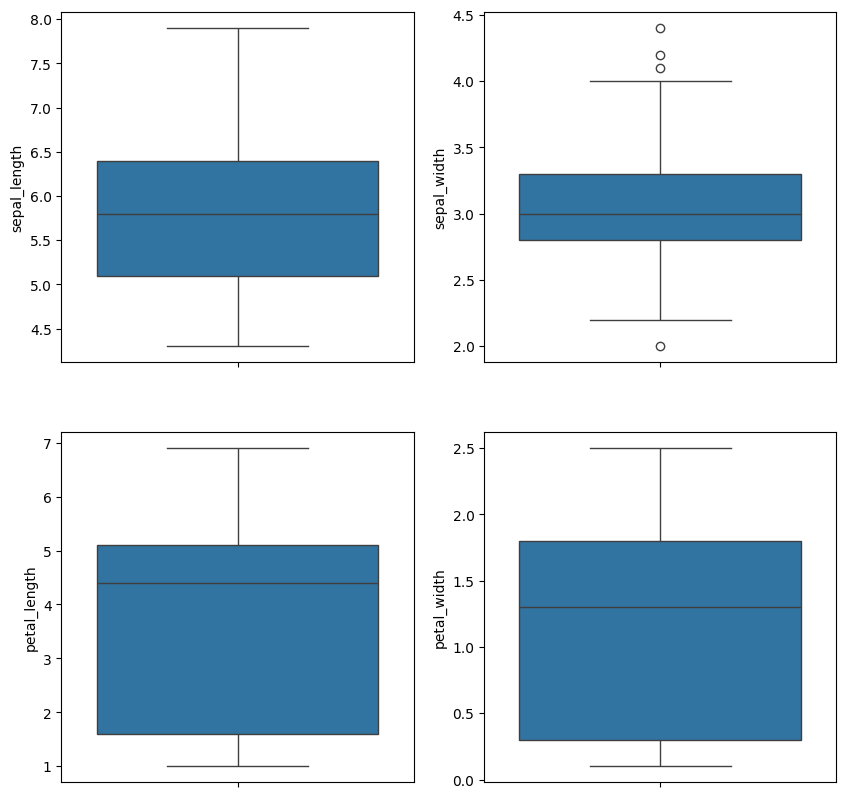

In [32]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
ax = ax.flatten()
sns.boxplot(y="sepal_length",data=df, ax=ax[0])
sns.boxplot(y="sepal_width",data=df, ax=ax[1])
sns.boxplot(y="petal_length",data=df, ax=ax[2])
sns.boxplot(y="petal_width",data=df, ax=ax[3])

### Summary of EDA
- Distribution on labels is even
- Thera are no significant outliers in the data set

## Correlation of features with label

In [40]:
# First we will do label encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df["species"] = le.fit_transform(df["species"])

<Axes: >

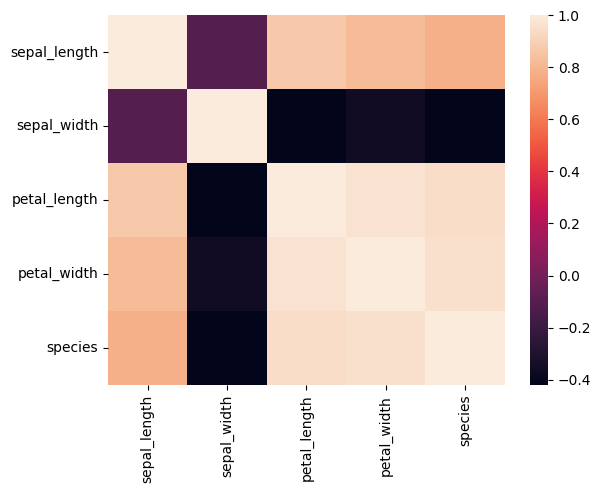

In [44]:
sns.heatmap(df.corr())

Summary:
- sepal_length, petal_length, petal_width has high positive correlation
- sepal_width moderated negative correlation

## Preprocessing and Modeling

In [49]:
from os import XATTR_CREATE
#Separating Label and Features

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 123)

### Scaling

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Power Tranformation

In [52]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()

X_train = pt.fit_transform(X_train)
X_test = pt.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score

lr = LogisticRegression()
svm = SVC()
knn = KNeighborsClassifier()

# Logistic Regression
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy of Logistic Regression: ", accuracy_score(y_test, y_pred))

# Logistic Regression
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)

print("Accuracy of SVM: ", accuracy_score(y_test, y_pred))

# Logistic Regression
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("Accuracy of KNN: ", accuracy_score(y_test, y_pred))

Accuracy of Logistic Regression:  0.9
Accuracy of SVM:  0.8666666666666667
Accuracy of KNN:  0.9


## Cross validation of models

In [68]:
from sklearn.model_selection import cross_val_score

print("Cross validation of Logistic Regression: ", np.mean(cross_val_score(lr, X_train, y_train, cv=8)))

Cross validation of Logistic Regression:  0.9827380952380953


In [71]:
print("Cross validation of KNN: ", np.mean(cross_val_score(knn, X_train, y_train, cv=8)))

Cross validation of KNN:  0.974404761904762


Based on the cross-validation results:

- Logistic Regression achieved an accuracy of approximately 98.27%.
- K-Nearest Neighbors (KNN) achieved an accuracy of approximately 97.44%.

From this information, we can conclude that both models perform well on the dataset. However, Logistic Regression slightly outperforms KNN in terms of accuracy. Therefore, if the goal is to choose the model with the highest accuracy, Logistic Regression would be the preferred choice based on the provided cross-validation scores. However, it's essential to consider other factors such as computational efficiency, interpretability, and model assumptions before making a final decision.